# Dive into Deep Learning
# Ch 4. Linear Neural Networks for Classification

This chapter introduces key concepts and techniques for classification tasks using neural networks.

이 장에서는 신경망을 사용한 분류 작업에 대한 핵심 개념과 기술을 소개합니다.

## softmax 회귀 (Softmax Regression)

Regression is a tool used to predict numbers. However, we often encounter category prediction problems. This problem is called 'classification'.

회귀는 수치를 예측하는데 사용하는 도구입니다. 그러나 우리는 종종 카테고리 예측 문제를 접합니다. 이런 문제는 '분류'라고 부릅니다.


### 분류(Classification)

For example, if you take a 2x2 huge gray image as input, you can express the huge values ​​as $x_1, x_2, x_3, x_4$, and define the image range as "cat", "chicken", or "dog". there is.

예를 들어, 2x2 픽셀의 회색 이미지를 입력으로 받는 경우, 픽셀 값을 $x_1, x_2, x_3, x_4$로 표현하고, 이미지의 레이블은 "고양이", "닭", "강아지" 중 하나로 정의할 수 있습니다.

ways to represent the battery is observation, which defines an animal as $y \in {1, 2, 3}$, which succeeds in validation but is not suitable for classification. Therefore, using the one-hot-encoding method

레이블을 표현하는 두 가지 방법 중, 첫 번째 방법은 각 동물을 $y \in {1, 2, 3}$으로 정의하는 것이지만, 이 방법은 회귀에는 적합하나 분류에는 적합하지 않습니다. 따라서, 원-핫-인코딩 방법을 사용하여

$$y \in \{(1, 0, 0), (0, 1, 0), (0, 0, 1)\}.$$

This is represented by three vectors. Here (1,0,0) means cat, (0,1,0) means chicken, and (0,0,1) means dog.

이렇게 3차원 벡터로 표현하게 됩니다. 여기서 (1,0,0)은 고양이를, (0,1,0)은 닭을, (0,0,1)은 강아지를 의미합니다.


### 선형 모델(Linear Model)

For classification, we need the same number of outputs as the number of input features. For example, if you have 4 features and 3 animal category outputs, the weights consist of 12 and the biases consist of 3 scalars. For each input, the three outputs are calculated according to the formula below:

분류를 위해, 입력 특성 수에 따라 같은 수의 출력이 필요합니다. 예컨대 4개의 특성과 3개의 동물 카테고리 출력이 있으면, 가중치는 12개, 편향은 3개의 스칼라로 구성됩니다. 각 입력에 대해 3개의 출력은 아래 공식에 따라 계산됩니다:

$$
\begin{aligned}
o_1 &= x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + b_1,\\
o_2 &= x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + b_2,\\
o_3 &= x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + b_3.
\end{aligned}
$$

Similar to linear regression, softmax regression consists of a single-layer neural network, and the output is computed relative to all input values.

선형 회귀와 유사하게, softmax 회귀는 단일층의 뉴럴 네트워크로 구성되며, 출력은 모든 입력 값들과 연관되어 계산됩니다.

![Softmax regression is a single-layer neural network.](./img/softmaxreg.svg)


### Softmax 연산 (softmax operation)

The output is converted into probability through softmax operation, and the predicted category is determined by selecting the class with the largest value. However, there is a problem in that it is difficult to measure the error of labels and output values ​​whose range of output values ​​is uncertain or discrete.

소프트맥스 연산을 통해 출력을 확률로 변환하고, 가장 큰 값의 클래스를 선택해 예측된 카테고리를 결정한다. 하지만, 출력값의 범위가 불확실하거나 이산적인 레이블과 출력값의 오류를 측정하기 어려운 문제가 있다.

To solve this problem, the softmax operation is used to convert the output values ​​into probability values. This non-linear transformation is done according to the formula below:

이러한 문제를 해결하기 위해, 소프트맥스 연산을 사용해 출력값들을 확률값으로 변환한다. 이 비선형 변환은 아래 공식에 따라 이루어진다:

$$
\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o}) \text{ where }
\hat{y}_i = \frac{\exp(o_i)}{\sum_j \exp(o_j)}
$$

The output value converted in this way is a value between 0 and 1, and the sum of all result values ​​is 1. Through this, the most probable class is found.

이렇게 변환된 출력 값은 0과 1 사이의 값이며, 모든 결과 값들의 합은 1이다. 이를 통해, 가장 가능성 있는 클래스를 찾는다.

$$
\hat{\imath}(\mathbf{o}) = \operatorname*{argmax}_i o_i = \operatorname*{argmax}_i \hat y_i
$$

In this way, the softmax operation does not change the prediction result of the category while giving appropriate meaning to the output value. To summarize this in vector representation:

이렇게, softmax 연산은 출력값에 적절한 의미를 부여하면서, 카테고리의 예측 결과를 바꾸지 않는다. 벡터 표현으로 이를 요약하면 다음과 같다:


$${\mathbf{o}}^{(i)} = \mathbf{W} {\mathbf{x}}^{(i)} + {\mathbf{b}}$$ $${\hat{\mathbf{y}}}^{(i)} = \mathrm{softmax}({\mathbf{o}}^{(i)})$$

### 미니 배치를 위한 벡터화 (Vectorization for mini-batch)

To further increase computational efficiency, vectorize operations on mini-batches of data. Suppose we have a mini-batch $\mathbf{X}$ of data of dimension $d$ and batch size $n$, resulting in $q$ categories. Then, the mini-batch feature $\mathbf{X}$ belongs to $\mathbb{R}^{n \times d}$, and the values ​​$\mathbf{W}$ are $\mathbb{R}^{ At d \times q}$ , the bias $\mathbf{b}$ belongs to $\mathbb{R}^q$ .

연산 효율을 더 높이기 위해서, 데이터의 미니 배치에 대한 연산을 벡터화합니다. 차원이 $d$ 이고 배치 크기가 $n$ 인 데이터들의 미니 배치  $\mathbf{X}$ 가 있고, 결과로 $q$ 개의 카테고리가 있다고 가정하겠습니다. 그러면, 미니 배치 feature  $\mathbf{X}$ 는  $\mathbb{R}^{n \times d}$ 에 속하고, 가충치들 $\mathbf{W}$ 는 $\mathbb{R}^{d \times q}$ 에, 편향(bias)  $\mathbf{b}$ 는 $\mathbb{R}^q$ 에 속합니다.

$$
\begin{aligned}
\mathbf{O} &= \mathbf{X} \mathbf{W} + \mathbf{b} \\
\hat{\mathbf{Y}} & = \mathrm{softmax}(\mathbf{O})
\end{aligned}
$$

This definition allows the most expensive operations to be accelerated. That is, $\mathbf{W} \mathbf{X}$ is converted from matrix-vector to matrix-matrix. Softmax is computed by applying the exponential function to every entry of the result $\mathbf{O}$ , and normalizing it to the sum of the values ​​of the exponential functions.

이렇게 정의하면 가장 많이 차지하는 연산을 가속화할 수 있습니다. 즉,  $\mathbf{W} \mathbf{X}$ 이 형렬-벡터의 곱에서 행렬-행렬의 곱으로 변환됩니다. softmax는 결과  $\mathbf{O}$ 의 모든 항목에 지수 함수를 적용하고, 지수 함수들의 값의 합으로 정규화(normalize) 하는 것으로 계산됩니다.


### 손실함수(loss function)

Now that we've defined how to output the probability result, we need to convert it into a value that measures how accurate it is. That is, we need a loss function. We use the same concept we used in linear regression, which is called likelihood maxmization.

확률 결과를 출력하는 방법을 정의했으니, 이 값이 얼마나 정확한지를 측정하는 값으로 변환하는 것이 필요합니다. 즉, 손실 함수(loss function)가 필요합니다. 선형 회귀에서 사용했던 것과 동일한 개념을 사용하는데, 이는 가능도 최대화(likelihood maxmization_이라고 합니다.

### 정보 이론(Information theory) 기초

Information theory deals with the problems of encoding, decoding, transmitting, and modulating information (or data) in as compact a form as possible.

정보 이론(information theory)는 정보 (또는 데이터)를 가능한 한 간결한 형식으로 인코딩, 디코딩, 전송, 및 변조하는 문제를 다룹니다.

### 엔트로피(Entropy)

An important concept is how many bits of information are contained in the data (or random number). This can be quantified as the entropy of the distribution $p$ as follows:

데이터 (또는 난수)에 몇개의 정보 비트들이 담겨있는지가 중요한 개념입니다. 이는 분표 $p$ 의 entropy로 다음과 같이 수치화할 수 있습니다.

$$
H[p] = \sum_j - p(j) \log p(j)
$$

One of the fundamental theories in information theory states that to encode data randomly sampled from a distribution $p$, we need at least $H[p]$ nats. Here, 'nat' is equivalent to a bit, but it uses the base $e$ instead of the base 2. In other words, 1 nat is approximately $\frac{1}{\log(2)} \approx 1.44$ bits, and $H[p] / 2$ is often referred to as binary entropy.

정보 이론의 근본적인 이론 중에 하나로 분포 $p$ 로부터 임의로 추출된 데이터를 인코드하기 위해서는 최소  $H[p]$ 개의 'nat'이 필요하다는 것이 있습니다. 여기서 'nat'은 비트와 동일하나, 베이스(base) 2가 아니라 베이스(base) $e$ 를 이용합니다. 즉, 1 nat은 $\frac{1}{\log(2)} \approx 1.44$  비트이고,  $H[p] / 2$ 는 종종 이진 앤트로피(binary entropy)라고 불립니다.

Let's delve into the theory a bit more. Consider a distribution where $p(1) = \frac{1}{2}$ and $p(2) = p(3) = \frac{1}{4}$. In this case, it is very easy to design an optimal code for data extracted from this distribution. Specifically, we can encode 1 as 0, 2 as 10, and 3 as 11. The expected number of bits is $1.5 = 0.5 \times 1 + 0.25 \times 2 + 0.25 \times 2$, and this number can be easily verified to be equal to the binary entropy $H[p] / \log 2$.

조금 더 이론적으로 들어가보겠습니다. $p(1) = \frac{1}{2}$ 이고,  $p(2) = p(3) = \frac{1}{4}$ 인 분포를 가정하겠습니다. 이 경우, 이 분포에서 추출한 데이터에 대한 최적의 코드를 굉장히 쉽게 설계할 수 있습니다. 즉, 1의 인코딩은 `0`, 2와 3에 대한 인코딩은 각 각 `10`, `11` 로 정의하면 됩니다. 예상되는 비트 개수는  $1.5 = 0.5 * 1 + 0.25 * 2 + 0.25 * 2$ 이고, 이 숫자는 이진 앤트로피(binary entropy) $H[p] / \log 2​$ 와 같다는 것을 쉽게 확인할 수 있습니다.


## 이미지 분류 데이터 세트 (The Image Classification Dataset)

Before implementing softmax regression, an appropriate dataset is required. To make it visually appealing and to better showcase differences between models, let's choose a classification problem.

softmax 회귀(regression) 구현에 앞서 적절한 데이터셋이 필요합니다. 시각적으로 돋보이게 만들기 위해서, 분류 문제 중에서 선택해보겠습니다.

The most common image classification dataset is the MNIST handwritten digit recognition dataset. This dataset was proposed by Lecun, Cortes and Burges in the 1990s. However, since almost all models show greater than 95% accuracy on the MNIST dataset, they are not good at explaining the differences between the models. To show the difference between the algorithms more intuitively, we will use a more complex dataset. This dataset is called Fashion-MNIST and was proposed by Xio, Rasul and Vollgraf in 2017.

가장 흔한 이미지 분류 데이터셋은 MNIST 손글씨 숫자 인식 데이터셋이 있습니다. 이 데이터셋은 1990년 대에 Lecun, Cortes와 Burges에 의해서 제안되었습니다. 하지만, 거의 모든 모델이 MNIST 데이터셋에 대해서 95% 이상의 정확도를 보여주기 때문에, 모델들 사이의 차이를 설명하기에 적합하지 않습니다. 알고리즘들의 차이를 보다 직관적으로 보여주기 위해서, 더 복잡한 데이터셋을 사용하겠습니다. 이 데이터셋은 Fashion-MNIST라는 것으로 2017년에 Xio, Rasul 그리고 Vollgraf가 제안했습니다.

First, import the packages and modules required in this chapter.

우선, 이 절에서 필요한 패키지와 모듈을 import 합니다.

In [1]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l # Dive into Deep Learning (D2L) 교재에서 제공하는 유틸리티 함수들을 담은 모듈

d2l.use_svg_display() # d2l.use_svg_display()를 호출하여 SVG 형식으로 시각화 결과를 표시하는 설정을 지정합니다.

### 데이터 세트 로드 ( Loading the Dataset)

Since it is such a frequently used dataset, all major frameworks provide preprocessed versions of it. We can download and read the Fashion-MNIST dataset into memory using built-in framework utilities.

자주 사용되는 데이터 세트이기 때문에 모든 주요 프레임워크는 전처리된 버전을 제공합니다. 내장된 프레임워크 유틸리티를 사용하여 Fashion-MNIST 데이터 세트를 다운로드하고 메모리로 읽을 수 있습니다.

In [2]:
class FashionMNIST(d2l.DataModule):  #@save
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

Looking at the code above, PyTorch can load the Fashion-MNIST dataset through the torchvision.datasets.FashionMNIST class.

위의 코드를 보면 PyTorch에서는 torchvision.datasets.FashionMNIST 클래스를 통해 Fashion-MNIST 데이터셋을 로드할 수 있습니다.

Fashion-MNIST consists of images from 10 categories, each represented by 6,000 images in the training dataset and by 1,000 in the test dataset. A test dataset is used for evaluating model performance (it must not be used for training). Consequently the training set and the test set contain 60,000 and 10,000 images, respectively.

Fashion-MNIST는 10개 범주의 이미지로 구성되며 각 범주는 훈련 데이터 세트에서 6,000개의 이미지로, 테스트 데이터 세트에서 1,000개로 표시됩니다. 테스트 데이터 세트는 모델 성능을 평가하는 데 사용됩니다(학습에 사용해서는 안 됨). 결과적으로 훈련 세트와 테스트 세트에는 각각 60,000개와 10,000개의 이미지가 포함됩니다.

In [3]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

(60000, 10000)

The images are grayscale and upscaled to $32 \times 32$ pixels in resolution above. This is similar to the original MNIST dataset which consisted of (binary) black and white images. Note, though, that most modern image data which has 3 channels (red, green, blue) and hyperspectral images which can have in excess of 100 channels (the HyMap sensor has 126 channels).
By convention we store image as a $c \times h \times w$ tensor, where $c$ is the number of color channels, $h$ is the height and $w$ is the width.


이미지는 회색조이며 위의 해상도에서 $32 \times 32$ 픽셀로 업스케일됩니다. 이것은 (바이너리) 흑백 이미지로 구성된 원본 MNIST 데이터 세트와 유사합니다. 그러나 3개 채널(빨간색, 녹색, 파란색)이 있는 대부분의 최신 이미지 데이터와 100개 이상의 채널(HyMap 센서에는 126개 채널이 있음)을 가질 수 있는 초분광 이미지가 있습니다.
관례에 따라 이미지를 $c \times h \times w$ 텐서로 저장합니다. 여기서 $c$는 색상 채널 수, $h$는 높이, $w$는 너비입니다.

In [4]:
data.train[0][0].shape

torch.Size([1, 32, 32])

The categories of Fashion-MNIST have human-understandable names. The following convenience method converts between numeric labels and their names.

Fashion-MNIST의 범주에는 사람이 이해할 수 있는 이름이 있습니다.
다음 편의 메서드는 숫자 레이블과 이름 사이를 변환합니다.

In [5]:
@d2l.add_to_class(FashionMNIST)  #@save
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

### 미니 배치 읽기 (Reading a Minibatch)

To make our life easier when reading from the training and test sets, we use the built-in data iterator rather than creating one from scratch. Recall that at each iteration, a data iterator reads a minibatch of data with size batch_size. We also randomly shuffle the examples for the training data iterator.

훈련 및 테스트 세트에서 읽을 때 우리의 삶을 더 쉽게 만들기 위해 우리는 처음부터 하나를 만드는 대신 내장된 데이터 반복자를 사용합니다. 각 반복에서 데이터 반복자는 크기가 batch_size인 데이터의 미니 배치를 읽습니다. 또한 교육 데이터 반복자에 대한 예제를 무작위로 섞습니다.

In [6]:
@d2l.add_to_class(FashionMNIST)  #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

To see how this works, let’s load a minibatch of images by invoking the train_dataloader method. It contains 64 images.

이것이 어떻게 작동하는지 보기 위해 메서드를 호출하여 이미지의 미니 배치를 로드해 보겠습니다 train_dataloader. 64개의 이미지가 포함되어 있습니다.

In [7]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


Let’s look at the time it takes to read the images. Even though it is a built-in loader, it is not blazingly fast. Nonetheless, this is sufficient since processing images with a deep network takes quite a bit longer. Hence it is good enough that training a network will not be IO constrained.

이미지를 읽는 데 걸리는 시간을 살펴보겠습니다. 빌트인 로더임에도 불구하고 엄청나게 빠르지는 않습니다. 그럼에도 불구하고 딥 네트워크로 이미지를 처리하는 데 시간이 꽤 오래 걸리므로 이 정도면 충분합니다. 따라서 네트워크 교육이 IO 제약을 받지 않는 것으로 충분합니다.

In [8]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'2.20 sec'

### 시각화 (Visualization)

 A convenience function show_images can be used to visualize the images and the associated labels. Details of its implementation are deferred to the appendix.

편의 함수 show_images를 사용하여 이미지 및 관련 레이블을 시각화할 수 있습니다. 구현에 대한 자세한 내용은 부록으로 연기됩니다.

In [9]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """Plot a list of images."""
    raise NotImplementedError

In general, it is a good idea to visualize and inspect data that you’re training on. Humans are very good at spotting unusual aspects and as such, visualization serves as an additional safeguard against mistakes and errors in the design of experiments. Here are the images and their corresponding labels (in text) for the first few examples in the training dataset.

일반적으로 훈련 중인 데이터를 시각화하고 검사하는 것이 좋습니다. 인간은 비정상적인 측면을 발견하는 데 매우 능숙하므로 시각화는 실험 설계의 실수와 오류에 대한 추가 보호 장치 역할을 합니다. 다음은 교육 데이터 세트의 처음 몇 가지 예에 대한 이미지와 해당 레이블(텍스트)입니다.

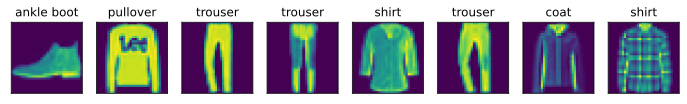

In [10]:
@d2l.add_to_class(FashionMNIST)  #@save
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

## 처음부터 Softmax 회귀 구현 (Softmax Regression Implementation from Scratch)

Let’s begin with the most important part: the mapping from scalars to probabilities. Given a matrix X we can sum over all elements (by default) or only over elements in the same axis. The axis variable lets us compute row and column sums:

가장 중요한 부분인 스칼라에서 확률로의 매핑부터 시작하겠습니다. 행렬 X가 주어지면 모든 요소(기본값) 또는 동일한 축의 요소에 대해서만 합산할 수 있습니다. 축 변수를 사용하면 행과 열 합계를 계산할 수 있습니다.

In [11]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

Defining softmax requires the following steps: First, exp is applied to each term to obtain the exponential value, and the values ​​of each term row are summed to obtain the normalization constant. Then, divide each row by the normalization constant and return the result. The resulting formula is as follows:

softmax를 정의하기 위해선 다음과 같은 단계들이 필요합니다. 우선 각 항에 exp를 적용해서 지수값을 구하고, 정규화 상수(normalization contatnt)를 구하기 위해서 각 항 행의 값들을 모두 더합니다. 그 뒤, 각 행을 정규화 상수(normalization contatnt)로 나누고 그 결과를 리턴합니다. 그렇게 나타난 수식은 아래와 같습니다.


$$\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}.$$


The denominator is also called the partition function. The name originates from statistical physics, which models the distribution over an ensemble of particles.

분모는 파티션(partition) 함수라고 불리기도 합니다. 이 이름은 파티클의 앙상블에 대한 분포를 모델링하는 통계 물리에서 기원합니다.

In [12]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

Replace each element of X with a non-negative number for all inputs. Each row is required for probabilities, so they sum to 1. Caution: The code above is not robust to very large or very small arguments. This should be enough to explain what's going on, but you shouldn't use this code verbatim for any serious purpose. Deep learning frameworks have this protection built in and will continue to use the built in softmax.

모든 입력에 대해 X각 요소를 음수가 아닌 숫자로 바꿉니다. 각 행은 확률에 필요하므로 합계가 1이 됩니다. 주의: 위의 코드는 매우 크거나 매우 작은 인수에 대해 강력 하지 않습니다 . 이는 무슨 일이 일어나고 있는지 설명하기에 충분하지만 심각한 목적을 위해 이 코드를 그대로 사용 해서는 안 됩니다. 딥 러닝 프레임워크에는 이러한 보호 기능이 내장되어 있으며 앞으로도 내장된 softmax를 사용할 것입니다.

In [13]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1807, 0.1667, 0.2941, 0.2245, 0.1340],
         [0.1624, 0.1494, 0.2898, 0.1258, 0.2726]]),
 tensor([1.0000, 1.0000]))

In [14]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

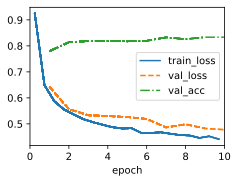

In [15]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [16]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

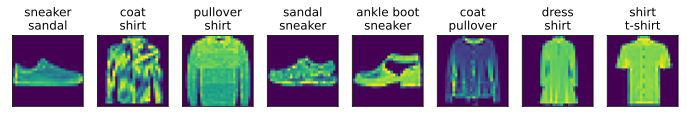

In [17]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

Visualize the actual label (first line of text output) versus the model's prediction (second line of text output).

실제 레이블(텍스트 출력의 첫 번째 줄)과 모델의 예측(텍스트 출력의 두 번째 줄)을 비교하여 시각화합니다.

## Softmax 회귀의 간결한 구현(Concise Implementation of Softmax Regression)

we construct our fully connected layer using the built-in layer. The built-in __call__ method then invokes forward whenever we need to apply the network to some input.

내장 계층을 사용하여 완전히 연결된 계층을 구성합니다. 내장된 __call__ 메서드는 네트워크를 일부 입력에 적용해야 할 때마다 앞으로 호출합니다.

Converts a Flatten 4th order tensor to quadratic by using a layer to keep the dimensions along the first axis unchanged.

첫 번째 축을 따라 차원을 변경하지 않고 유지하기 위해 레이어를 사용하여 Flatten 4차 텐서를 2차 텐서로 변환합니다.

In [18]:
from torch import nn
from torch.nn import functional as F

class SoftmaxRegression(d2l.Classifier):  #@save
    """The softmax regression model."""
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.LazyLinear(num_outputs))

    def forward(self, X):
        return self.net(X)


### Softmax 다시 살펴보기(Revisited)

The way the softmax function is implemented and the output probabilities of the model is calculated is computationally risky due to numerical underflow and overflow problems that occur when dealing with exponential functions.

소프트맥스 함수를 구현하고 모델의 출력 확률을 계산하는 방식은 지수 함수를 다룰 때 발생하는 수치적인 언더플로우(underflow)와 오버플로우(overflow) 문제로 인해 계산에 위험이 따를 수 있습니다.

The softmax function computes probabilities as $\hat y_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$. When some of the $o_k$ values are very large (positive), the exponential function $\exp(o_k)$ can exceed the range of representable numbers for certain data types, leading to overflow. Conversely, if all the arguments are very negative, we encounter underflow. This can be problematic, as standard floating-point numbers have a limited range (e.g., approximately $10^{-38}$ to $10^{38}$ for single precision). If the largest term in $\mathbf{o}$ falls outside the range $[-90, 90]$, the result may not be stable.

소프트맥스 함수는 $\hat y_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$와 같이 확률을 계산합니다. $o_k$ 값 중 일부가 매우 큰 양수인 경우, 지수 함수 $\exp(o_k)$는 특정 데이터 타입에 대해 표현 가능한 수치 범위를 초과할 수 있어 오버플로우가 발생할 수 있습니다. 반대로 모든 인수가 매우 음수인 경우 언더플로우가 발생합니다. 표준 부동 소수점 숫자는 제한된 범위를 갖기 때문에 (예: 단정밀도의 경우 약 $10^{-38}$에서 $10^{38}$ 범위), $\mathbf{o}$의 가장 큰 항목이 범위 $[-90, 90]$ 밖에 위치할 경우 결과가 불안정해질 수 있습니다.

To address these issues, we can apply a simple trick by subtracting the maximum value $\bar{o} \stackrel{\mathrm{def}}{=} \max_k o_k$ from all the entries:

이러한 문제를 해결하기 위해 간단한 트릭을 적용하여 모든 항목에서 최댓값 $\bar{o} \stackrel{\mathrm{def}}{=} \max_k o_k$을 빼는 방식을 사용합니다: 

<br>

$$
\hat y_j = \frac{\exp(o_j - \bar{o})}{\sum_k \exp (o_k - \bar{o})}.
$$

<br>
By construction, $o_j - \bar{o} \leq 0$ for all $j$. For a $q$-class classification problem, the denominator lies within the interval $[1, q]$, and the numerator is bounded by $1$, preventing numerical overflow. Numerical underflow occurs only when $\exp(o_j - \bar{o})$ evaluates to $0$. However, this becomes a problem when we want to compute $\log \hat{y}_j$ and encounter $\log 0$. In backpropagation, this could lead to undesired `NaN` (Not a Number) results.

이렇게 하면 $o_j - \bar{o} \leq 0$이 모든 $j$에 대해 성립됩니다. $q$개의 클래스를 분류하는 문제의 경우 분모는 구간 $[1, q]$에 포함되며, 분자는 $1$보다 작아지므로 수치적인 오버플로우를 방지합니다. 수치적 언더플로우는 $\exp(o_j - \bar{o})$가 $0$으로 평가될 때만 발생합니다. 그러나 이 값으로 $\log \hat{y}_j$를 계산하려고 할 때 $\log 0$과 마주치는 문제가 발생합니다. 역전파(backpropagation)에서는 이로 인해 원치 않는 NaN(Not a Number) 결과가 발생할 수 있습니다.

<br>

Fortunately, by combining the softmax function and the cross-entropy loss, we can avoid these numerical stability issues. Instead of passing the softmax probabilities into the loss function, we [**pass the logits and compute the softmax and its log all at once inside the cross-entropy loss function,**] which handles the numerical stability problem using techniques like the ["LogSumExp trick"](https://en.wikipedia.org/wiki/LogSumExp).

다행히도 소프트맥스 함수와 크로스 엔트로피 손실을 결합함으로써 이러한 수치적 안정성 문제를 피할 수 있습니다. 소프트맥스 확률을 손실 함수에 직접 전달하는 대신, 손실 함수 내부에서 로짓(logits)을 전달하고 소프트맥스와 로그 소프트맥스를 한 번에 계산하는 방식을 사용하여 수치적 안정성 문제를 처리합니다. 이를 "LogSumExp 트릭"이라는 기법을 활용합니다.



This approach allows us to calculate the log-softmax directly from the logits without the risk of numerical instability.


이 방식은 로짓으로부터 로그 소프트맥스를 직접 계산하여 수치적 불안정성의 위험 없이 작업할 수 있도록 해줍니다.

In [19]:
@d2l.add_to_class(d2l.Classifier)  #@save
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    return F.cross_entropy(
        Y_hat, Y, reduction='mean' if averaged else 'none')


The code above adds a loss method that takes the predicted and actual values ​​as input, flattens them, and calculates the cross entropy loss. Returns the average loss or the loss of individual samples, depending on whether averaged or not.

위의 코드는 loss 메서드를 추가하여 예측값과 실제값을 입력으로 받고, 이를 평탄화한 후 크로스 엔트로피 손실을 계산합니다. 평균화 여부에 따라 평균 손실 또는 개별 샘플의 손실을 반환합니다.

<br>

### 모델 훈련 (Training)

Next we train our model. We use Fashion-MNIST images, flattened to 784-dimensional feature vectors. As before, this algorithm converges to a solution that achieves a decent accuracy, albeit this time with fewer lines of code than before.

다음으로 모델을 훈련합니다. 784차원 특징 벡터로 평면화된 Fashion-MNIST 이미지를 사용합니다. 이전과 마찬가지로 이 알고리즘은 이번에는 이전보다 적은 코드 줄이지만 적절한 정확도를 달성하는 솔루션으로 수렴됩니다.

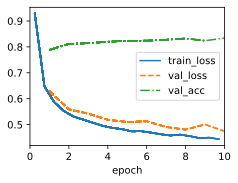

In [20]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

## 환경(Environment)

We weren't concerned about where the data came from or how the model was deployed. However, not taking these into account is a problem. Tracing the cause of many failed machine learning deployments, this situation is the cause. Learn how to detect and mitigate this situation early. Depending on the situation, it can be a rather simple problem that requires the use of accurate data, but it can also be a difficult problem, such as building a reinforcement learning system.

우리는 데이터가 어디서 왔는지 모델이 어떻게 배포되는지에 대해서는 걱정하지 않았습니다. 하지만, 이것들을 고려하지 않는 것은 문제가 됩니다. 실패한 많은 머신러닝 배포들의 원인을 추적해보면 이런 상황이 원인이 됩니다. 이 상황을 초기에 발견하고, 완화하는 방법을 알아봅니다. 상황에 따라서, 정확한 데이터를 사용하면 되는 다소 간단한 문제일 수 있기도 하지만, 강화학습 시스템을 만드는 것과 같이 어려운 문제이기도 합니다.

### 공변량 변화(covariate shift)

It's easy to understand, but there are issues that are easy to miss. Consider the problem of distinguishing between dogs and cats. The training data was given as below.

이해하는 것은 쉽지만, 놓치기 쉬운 문제가 있습니다. 강아지와 고양을 구분하는 문제를 생각해봅시다. 학습 데이터는 아래와 같이 주어졌습니다.

![Training data for distinguishing cats and dogs.](./img/cat-dog-train.svg)

<br>
In the test, you are asked to classify the following picture.

테스트에서는 다음 그림을 분류하도록 요청 받습니다.

![Test data for distinguishing cats and dogs.](./img/cat-dog-test.svg)

Unsurprisingly, this doesn't work very well. The training data consists of real pictures, but the test set consists of cartoon pictures. The colors are also inaccurate. It is a bad idea to train on different data than the test set without planning how to apply it to a new domain. Unfortunately, this is a common pitfall. Statisticians call this the covariate shift. That is, a situation where the distribution of covariates (training data) differs from the distribution of test data. Mathematically speaking, $P(x)$ changes, but $P(\mathbf{y} \mid x)$ stays the same.

당연하게 이것은 잘 작동하지 않습니다. 학습 데이터는 실제 사진으로 구성되어 있지만, 테스트셋은 만화 그림으로 되어있습니다. 색상도 정확하지 않습니다. 새로운 도메인에 어떻게 적용할지 계획이 없이 테스트셋과 다른 데이터로 학습을 시키는 것은 나쁜 아이디어 입니다. 불행하게도 이것은 흔한 함정입니다. 통계학자들은 이것을 공변량 변화(covariate shift) 라고 합니다. 즉, 공변량(covariates)(학습 데이터)의 분포가 테스트 데이터의 분포가 다른 상황을 의미합니다. 수학적으로 말하자면, $P(x)$는 변화하는데,  $P(\mathbf{y} \mid x)$는 그대로 있는 경우를 의미합니다

<br>

### 개념 변화(concept shift)
<br>

![Concept shift on soft drink names in the United States.](./img/popvssoda.png)
<br>

If you are building a machine translation system, the distribution $P(\mathbf{y} \mid x)$ may vary from region to region. It's quite tricky to pinpoint this issue. Fortunately, in many cases $P(\mathbf{y} \mid x)$ changes only slightly.

기계 번역 시스템을 만든다면, 분포 $P(\mathbf{y} \mid x)$는 지역에 따라서 다를 수 있습니다. 이 문제를 집어 내기에는 상당이 까다롭습니다. 다행한 것은 많은 경우에 $P(\mathbf{y} \mid x)$는 조금씩만 변화한다는 것입니다. 

## 분포이동 예제(Examples of Distribution Shift)

### 의학 분석(Medical Diagnostics)

In an algorithm that diagnoses cancer, data from healthy and sick people is used to train the algorithm. If the trained model performs well while showing high accuracy, I believe it can launch a successful career in medical analytics. However, in practice this is not an ideal situation.

암을 진단하는 알고리즘에서는 건강한 사람과 아픈 사람의 데이터를 사용하여 알고리즘을 학습시킵니다.학습된 모델이 높은 정확도를 보여주면서 잘 동작한다면, 의료 분석 분야에서 성공적인 경력을 시작할 수 있다고 생각합니다. 그러나 실제로는 이상적인 상황이 아닙니다. 

<br>

The difference between the learning distribution and the actual distribution can lead to serious problems. Take the example of a startup several years ago developing a blood test for diseases found in older men. It obtained many samples from patients, but for ethical reasons it was difficult to obtain samples from healthy men. As a solution, we received blood donations from college students and tested them. However, their sampling method resulted in severe covariate changes, and the disease classification model failed. Differences in sample age, hormonal levels, physical activity, diet, alcohol consumption, and many other factors not related to the disease created a large gap between the test and actual patients. This resulted in wasted money without useful results.

학습 분포와 실제 분포의 차이는 심각한 문제를 초래할 수 있습니다. 수년 전, 나이 많은 남성에서 발견되는 질병에 대한 혈액 테스트를 개발한 스타트업의 예시를 들자면, 환자의 샘플을 많이 얻었지만, 윤리적 이유로 건강한 남자의 샘플을 얻기 어려웠습니다. 해결책으로 대학생들로부터 혈액을 기증받아 테스트했습니다. 하지만, 그들의 샘플링 방식은 심한 공변량 변화를 초래하였고, 질병 분류 모델은 실패했습니다. 샘플의 나이, 호르몬 레벨, 신체활동, 식이상태, 알콜섭취 그리고 질병과 연관이 없는 아주 많은 요소들의 차이는 테스트와 실제 환자 사이의 큰 격차를 만들었습니다. 이로 인해 유용한 결과를 얻지 못하고 비용만 낭비하게 되었습니다.


### 자율 주행 자동차 (Self-Driving Cars)

A company wants to create a machine learning system for self-driving cars. Detecting roads is one of the important components. Since it is too expensive to give actual answers, we decided to use the data generated using the game rendering engine as additional training data. The model trained in this way worked well on the 'test data' created by the rendering engine. However, in a real car it was a disaster. The reason was that the rendered road used textures that were too simple. More importantly, all road borders were rendered with the same texture, so the road detector learned this 'feature' too quickly.

자율 주행차를 위한 머신러닝 시스템을 만들고자 하는 한 회사가 있습니다. 도로를 탐지하는 것이 중요한 컴포넌트 중에 하나입니다. 실제 답을 다는 것이 너무 비싸기 때문에, 게임 렌더링 엔진을 사용해서 생성한 데이터를 추가 학습 데이터로 사용하기로 했습니다. 이렇게 학습된 모델은 렌더링 엔진으로 만들어진 '테스트 데이터'에는 잘 동작했습니다. 하지만, 실제 차에서는 재앙이었습니다. 이유는 렌더링 된 도로가 너무 단순한 텍스처를 사용했기 때문이었습니다. 더 중요한 것은 모든 도로 경계가 같은 텍스터로 렌더되었기에, 도로 탐지기는 이 '특징'을 너무 빨리 배워버렸습니다.

A similar problem arose when the US military tried to detect tanks in the woods. I took an aerial photo of the forest without the tank, drove the tank into the forest and took another photo. The classifier trained in this way worked perfectly. Unfortunately, the model was distinguishing between shady and non-shady trees. The reason was that the first photo was taken early in the morning and the second photo was taken at noon.

미국 군대에서 숲 속에서 있는 탱크를 탐지하는 것을 하려고 했을 때도 비슷한 문제가 발생했습니다. 탱크가 없는 숲의 항공 사진을 찍고, 탱크를 숲으로 몰고 가서 다른 사진을 찍었습니다. 이렇게 학습된 분류기는 아주 완벽하게 동작했습니다. 하지만 불행히도 이 모델은 그늘이 있는 나무들과 그늘이 없는 나무를 구분하고 있었습니다. 이유는 첫번째 사진은 이른 아침에 찍었고, 두번째 사진은 정오에 찍었기 때문이었습니다.


### 정적이지 않은 분포 (Nonstationary Distributions)

A more elusive situation is when the distribution changes slowly and the model is not properly updated. Typical examples include:

더 알아내기 힘든 상황은 분포가 천천히 변화하는 상황에서 모델을 적절하게 업데이트를 하지 않는 경우입니다. 전형적인 사례로는 다음과 같은 경우가 있습니다.

- After training the advertising model, if it fails to update frequently. (e.g. if you forgot to reflect that a new device called the iPad just came out)

광고 모델을 학습시킨 후, 자주 업데이트하는 것을 실패한 경우. (예를 들면, iPad 라는 새로운 디바이스가 막 출시된 것을 반영하는 것을 잊은 경우)

- Created a spam filter. This spam filter does a good job of detecting all the spam we've seen. However, the spammers know this and create a new message that is unlike anything you've seen before.

스팸 필더를 만들었습니다. 이 스팸 필터는 우리가 봤던 모든 스팸을 모두 잘 탐지합니다. 하지만, 스팸을 보내는 사람들이 이를 알고 이전에 봐왔던 것과는 아무 다른 새로운 메시지를 만듭니다.

- Created a product recommendation system. Works well in winter. However, even after Christmas, we continue to recommend Santa hats.

상품 추천 시스템을 만들었습니다. 겨울에는 잘 동작합니다. 하지만, 크리스마스가 지난 후에도 산타 모자를 계속 추천하고 있습니다

### 공변량 변화 교정 (Correction of Covariate Shift)

Covariate shift is the problem where training data should be extracted from a specific distribution $p(x)$ but is extracted from a different distribution $q(x)$. In such cases, we try to minimize the following equation for learning:

학습 데이터가 특정 분포 $p(x)$에서 추출되어야 하는데 다른 분포 $q(x)$에서 추출되는 문제를 공변량 변화라고 합니다. 이럴 때, 우리는 다음 수식을 최소화하는 학습을 시도합니다.

$$\mathop{\mathrm{minimize}}_w \frac{1}{n} \sum_{i=1}^n l(x_i, y_i, f(x_i)) + \mathrm{some~penalty}(w)$$

However, to correct the data selected from the wrong distribution $q$, we can use the following identity:

하지만 잘못된 분포 $q$에서 선택된 데이터를 수정하기 위해 아래와 같은 아이덴티티(identity)를 사용할 수 있습니다.

$$\begin{aligned}
\int p(x) f(x) dx & = \int p(x) f(x) \frac{q(x)}{p(x)} dx \\
& = \int q(x) f(x) \frac{p(x)}{q(x)} dx
\end{aligned}$$

To adjust the weights of the data, we multiply the ratio of the probabilities for the correct distribution, $\beta(x) := p(x)/q(x)$. Methods such as logistic regression are used to calculate this ratio. Once the ratio is calculated, we use it to apply new weights for learning.

데이터의 가중치를 조절하기 위해 올바른 분포에 대한 확률의 비율 $\beta(x) := p(x)/q(x)$를 곱합니다. 이 비율을 계산하는 데는 로지스틱 회귀 등의 방법이 사용됩니다. 비율이 계산되면, 이를 사용해 새로운 가중치를 적용하여 학습을 진행합니다.

### 개념 변화 교정 (Correction of Concept Shift)

Concept shift refers to the case where the classification criteria learned previously change over time. These changes occur slowly, and we can handle this by learning incrementally based on the existing weights for new data. In this way, we do not discard the original learning, but proceed with learning gradually in response to new changes.


개념 변화는 기존에 학습된 분류 기준이 시간이 지나면서 변하는 경우를 말합니다. 이런 변화는 천천히 일어나며, 새로운 데이터에 대해 기존 가중치를 기반으로 추가 학습을 시키는 방식으로 이를 처리할 수 있습니다. 이렇게 하면 기존 학습을 버리지 않고, 새로운 변화에 대응하는 방향으로 점진적으로 학습을 진행하게 됩니다.